In [2]:
%matplotlib inline


# Nearest Neighbors Classification


Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.



In [3]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

from sklearn import neighbors

Automatically created module for IPython interactive environment


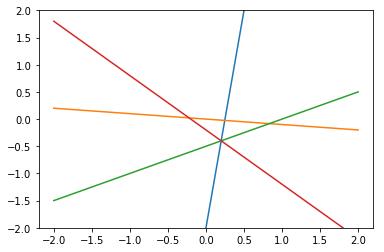

In [4]:
n_neighbors = 1

# Dataset
def constr1(x):
    return 8*x-2
def constr2(x):
    return -0.1*x
def constr3(x):
    return 0.5*x-0.5
def constr4(x):
    return -1*x-0.2

xs = np.linspace(-2,2,100)
plt.ylim(-2,2)
plt.plot(xs,constr1(xs))
plt.plot(xs,constr2(xs))
plt.plot(xs,constr3(xs))
plt.plot(xs,constr4(xs))

In [5]:
def cl1(x_input,y_input):
    x=np.asarray(x_input)
    y=np.asarray(y_input)
    
    return (constr1(x) - y < 0) * (constr2(x) - y < 0)*1 \
        + (constr1(x) - y < 0) * (constr2(x) - y > 0) * (constr3(x) - y < 0)*2\
        + (constr4(x) - y > 0) * (constr3(x) - y > 0)*3 
        # + (constr1(x) - y < 0) * (constr2(x) - y > 0) * (constr3(x) - y < 0)*4 

In [6]:
cl1(-1,1),cl1(-1,-0.5),cl1(0,-2),cl1(1,1)

(1, 2, 3, 0)

In [7]:
colors = [(0.368, 0.507, 0.71), (0.881, 0.611, 0.142), (0.923, 0.386, 0.209),
          (0.56, 0.692, 0.195),(0.528, 0.471, 0.701), (0.772, 0.432, 0.102), (0.572, 0.586, 0.) ]

def darker(color,factor=0.87):
    r,g,b = color
    return (np.clip(r*factor,0,1),np.clip(g*factor,0,1),np.clip(b*factor,0,1))

cmap_bold = LinearSegmentedColormap.from_list( "our_ccode", colors, N=len(colors))
c_light = np.asarray([ darker(c,1.3) for c in colors ])
cmap_light = LinearSegmentedColormap.from_list( "our_ccode_light", c_light, N=len(colors))

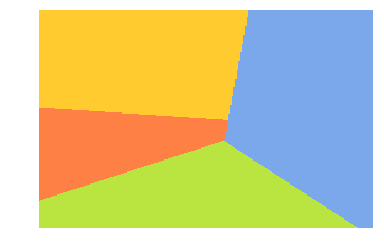

In [8]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = -2,2
y_min, y_max = -2,2
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = cl1(xx.ravel(), yy.ravel())

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, vmin=0, vmax=6)
plt.gca().axis('off')
plt.savefig("voronoi_ground_truth.pdf", bbox_inches="tight")
plt.savefig("voronoi_ground_truth.png", bbox_inches="tight")

In [9]:
np.random.seed(2)

In [10]:
# X = np.random.randn(5000,2)
X_all = np.random.rand(5000,2)*4-2
y_all = cl1(*zip(*X_all))

In [11]:
X = X_all[0:5]
y = y_all[0:5]

In [12]:
def plot_clusters(X,y):
    h = .02  # step size in the mesh

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = -2,2
    y_min, y_max = -2,2
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, vmin=0, vmax=6)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, vmin=0, vmax=6,
                edgecolor='k', linewidth=0.1, s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.gca().axis('off')

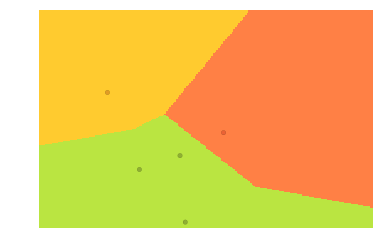

In [13]:
plot_clusters(X_all[0:5],y_all[0:5])
plt.savefig("voronoi_knn_5.pdf", bbox_inches="tight")
plt.savefig("voronoi_knn_5.png", bbox_inches="tight")

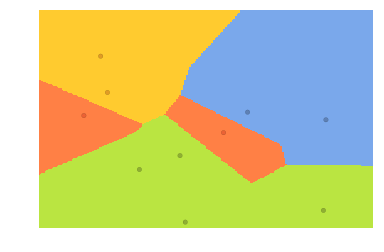

In [14]:
plot_clusters(X_all[0:10],y_all[0:10])
plt.savefig("voronoi_knn_10.pdf", bbox_inches="tight")
plt.savefig("voronoi_knn_10.png", bbox_inches="tight")

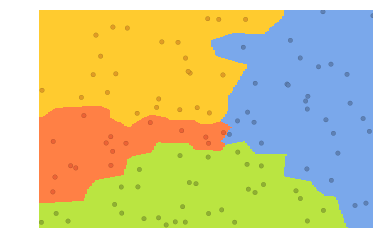

In [18]:
plot_clusters(X_all[0:100],y_all[0:100])
plt.savefig("voronoi_knn_100.pdf", bbox_inches="tight")
plt.savefig("voronoi_knn_100.png", bbox_inches="tight")

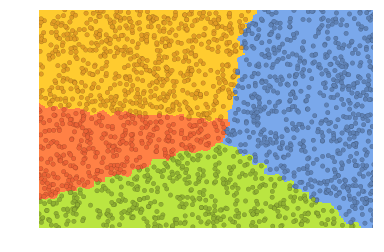

In [16]:
plot_clusters(X_all[0:2000],y_all[0:2000])
plt.savefig("voronoi_knn_2000.pdf", bbox_inches="tight")
plt.savefig("voronoi_knn_2000.png", bbox_inches="tight")